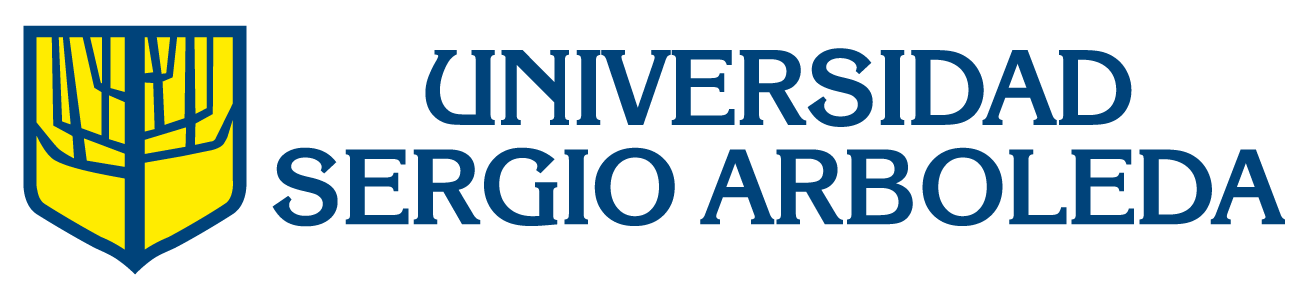

**Autor:** Pedro Luis Cardenas Diaz

**Fecha:** 23-05-2022

**Materia:** HPC-1

**Tema:** Parcial 3 de HPC para IA

**Docente:** John Jairo Corredor Franco

En un cuaderno interprete de "Python", a traves de una documentacion de cada uno de los pasos y la identificacion del propietario del cuaderno, buscar: 

    1. Dataset entregado al Ingeniero en Formación para el parcial
    2. Análisis Exploratorio de los Datos del Dataset entregado (Información, Resumen Estadístico, Correlación, Distribución, etc.)
    3. Documentar las decisiones tomadas por el Ingeniero sobre el dataset
    4. Documentar las precisiones del Ingeniero sobre el modelo Machine Learning basado en el EDA
    5. Crear un modelo en Python-Sklearn para Regresión Lineal usando la Normalización
    6. Presentar el vector de coeficientes y punto de corte del Modelo RL en Sklearn
    7. Crear vectores de predicciones del modelo LR Sklearn (y_train_hat_sk, y_test_hat_sk)
    8. Evaluar el modelo LR Sklearn para entrenamiento y prueba (métrica de rendimiento: explicar la métrica brevemente)

usando el DataSet "***povertyUSA_HPC.csv***" dado por el docente.

# ***Procedimiento***

A la hora de comenzar el cuaderno en Colab, primero se ha de imprimir el Dataset dado por el docente y verificar si es utilizable para proceder con este.

1. Se importan las librerias a usar.

In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

2. Se importa el dataset al cuaderno y se imprime

In [ ]:
url = '/content/povertyUSA_HPC.csv'
# Se carga en la variable dfWinedata el objeto Dataset
dfpovertyUSA = pd.read_csv(url)
# Ahora se presenta el objeto Dataset dfWinedata
dfpovertyUSA

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,20.1,31.5,88.7,11.2,54.5
1,7.1,18.9,73.7,9.1,39.5
2,16.1,35.0,102.5,10.4,61.2
3,14.9,31.6,101.7,10.4,59.9
4,16.7,22.6,69.1,11.2,41.1
5,8.8,26.2,79.1,5.8,47.0
6,9.7,14.1,45.1,4.6,25.8
7,10.3,24.7,77.8,3.5,46.3
8,22.0,44.8,101.5,65.0,69.1
9,16.2,23.2,78.4,7.3,44.5


Para el uso de este dataset se usara "TeenBrth (Teen Birth)" como la variable independiente.

3. Se verifica el dataset a traves de .info

In [ ]:
dfpovertyUSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PovPct      51 non-null     float64
 1   Brth15to17  51 non-null     float64
 2   Brth18to19  51 non-null     float64
 3   ViolCrime   51 non-null     float64
 4   TeenBrth    51 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


4. Visualizacion de los datos dispersión par por variables

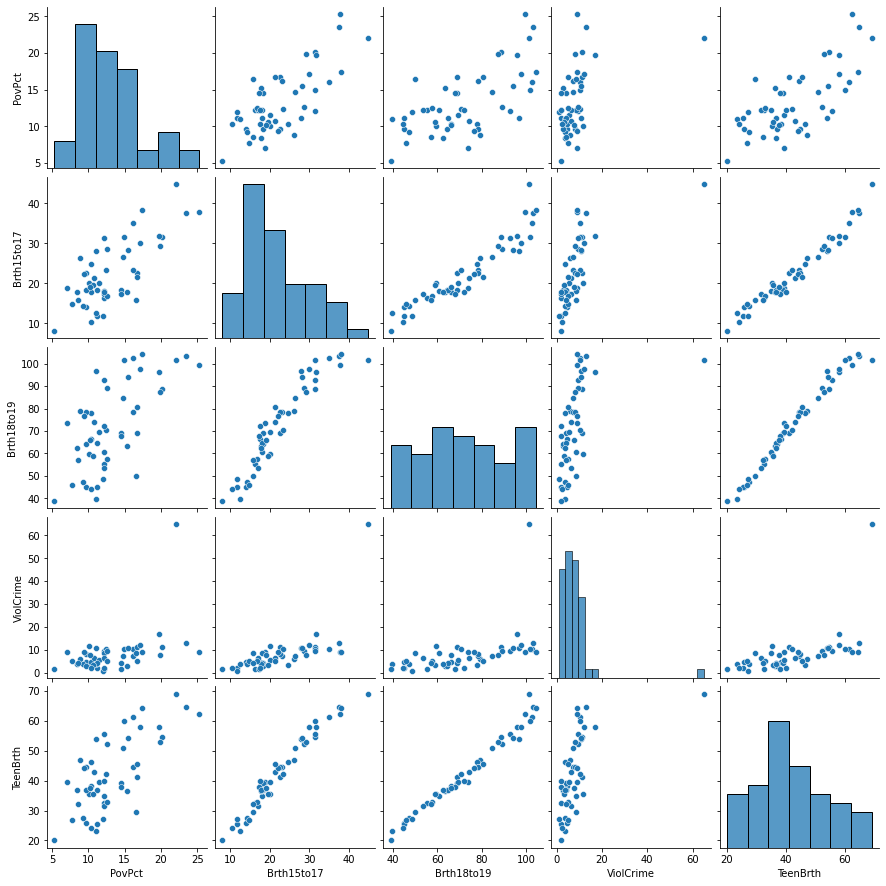

In [ ]:
sns.pairplot(dfpovertyUSA)

5. Se genera la matriz de correlación no normalizada

In [ ]:
MatrizCorrNoNorm = dfpovertyUSA.corr()
MatrizCorrNoNorm

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
PovPct,1.000000,0.730293,0.649660,0.469564,0.703285
Brth15to17,0.730293,1.000000,0.942449,0.640274,0.978826
Brth18to19,0.649660,0.942449,1.000000,0.477704,0.988975
ViolCrime,0.469564,0.640274,0.477704,1.000000,0.557937
TeenBrth,0.703285,0.978826,0.988975,0.557937,1.000000


Se usa la variable TeenBrth como independiente debido a su fuerte correlacion con las oras variables como se observa en la columna 5 de la matriz de correlacion.

6. Se realiza el resumen estadistico del dataset.

In [ ]:
dfpovertyUSA.describe()

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,13.117647,22.282353,72.019608,7.854902,42.243137
std,4.277228,8.043499,18.975563,8.914131,12.318511
min,5.300000,8.100000,39.000000,0.900000,20.000000
25%,10.250000,17.250000,58.300000,3.900000,33.900000
50%,12.200000,20.000000,69.400000,6.300000,39.500000
75%,15.800000,28.100000,87.950000,9.450000,52.600000
max,25.300000,44.800000,104.300000,65.000000,69.100000


7. Se realiza la graficacion de la distribucion de las variables


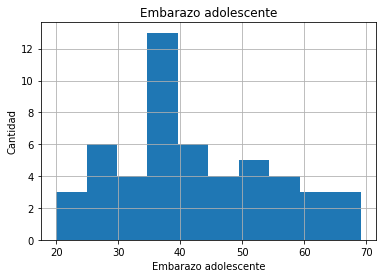

In [ ]:
#Distribucion de la variable independiente TeenBirth
plt.hist(dfpovertyUSA['TeenBrth'])
plt.title('Embarazo adolescente')
plt.xlabel('Embarazo adolescente')
plt.ylabel('Cantidad')
plt.grid()
plt.show()

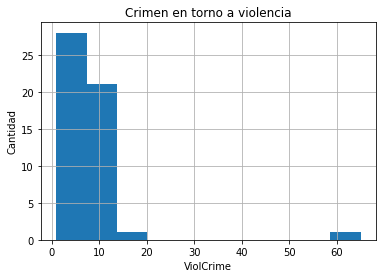

In [ ]:
#Distribucion de la variable dependiente ViolCrime
plt.hist(dfpovertyUSA['ViolCrime'])
plt.title('Crimen en torno a violencia')
plt.xlabel('ViolCrime')
plt.ylabel('Cantidad')
plt.grid()
plt.show()

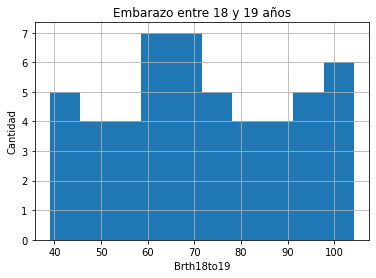

In [ ]:
#Distribucion de la variable dependiente Brth18to19
plt.hist(dfpovertyUSA['Brth18to19'])
plt.title('Embarazo entre 18 y 19 años')
plt.xlabel('Brth18to19')
plt.ylabel('Cantidad')
plt.grid()
plt.show()

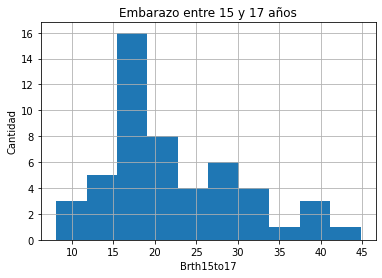

In [ ]:
#Distribucion de la variable dependiente Brth15to17
plt.hist(dfpovertyUSA['Brth15to17'])
plt.title('Embarazo entre 15 y 17 años')
plt.xlabel('Brth15to17')
plt.ylabel('Cantidad')
plt.grid()
plt.show()

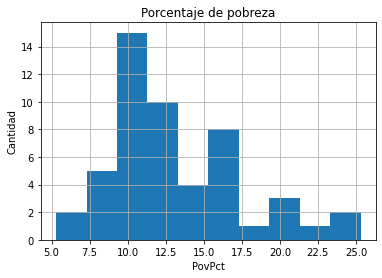

In [ ]:
#Distribucion de la variable dependiente PovPct
plt.hist(dfpovertyUSA['PovPct'])
plt.title('Porcentaje de pobreza')
plt.xlabel('PovPct')
plt.ylabel('Cantidad')
plt.grid()
plt.show()

8. A travez de la biblioteca Sklearn de la importacion de nombre normalize, se realiza la normalizacion de los datos de los datasets.

***Normalizar:*** Es el comprimir comprimir o extender los valores de la variable para que estén en un rango definido.

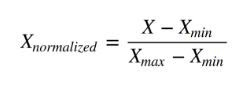

X = Dato a normalizar

Xmin = Menor dato entre los datos a normalizar

Xmax = Mayor dato entre los datos a normalizar


In [ ]:
dfpovertyUSA_normalized = normalize(dfpovertyUSA)

In [ ]:
dfpovertyUSA_normalized

array([[0.1807978 , 0.28333984, 0.79784901, 0.10074305, 0.4902229 ],
       [0.08208027, 0.21849536, 0.85201629, 0.10520147, 0.45664374],
       [0.12790651, 0.27805762, 0.81431161, 0.08262284, 0.48620361],
       [0.1206186 , 0.25580856, 0.82328263, 0.08419016, 0.48490294],
       [0.19440816, 0.26309128, 0.8044074 , 0.13038152, 0.4784536 ],
       [0.09143219, 0.27221855, 0.82185067, 0.06026212, 0.48833099],
       [0.17669368, 0.25684338, 0.82153451, 0.08379288, 0.46996874],
       [0.10902701, 0.26145311, 0.82352437, 0.03704801, 0.49009227],
       [0.14902639, 0.30347192, 0.68755356, 0.44030524, 0.46807834],
       [0.17094562, 0.24481102, 0.8272924 , 0.07703105, 0.46957285],
       [0.10638231, 0.27606649, 0.81589078, 0.0835233 , 0.48971031],
       [0.12966833, 0.22282809, 0.83592008, 0.05916904, 0.48090583],
       [0.17494988, 0.22200537, 0.83372669, 0.04946859, 0.47176141],
       [0.1426277 , 0.26915227, 0.81090748, 0.11847301, 0.48539427],
       [0.10222993, 0.24066629, 0.

Se procedera a imprimir la primera fila del dataset normalizado para realizar la comparacion con los datos normalizados por C++ mas adelante.

In [ ]:
dfpovertyUSA_normalized[0]

array([0.1807978 , 0.28333984, 0.79784901, 0.10074305, 0.4902229 ])

**A continuacion se ajusta los datos (X, Y) a un modelo de Regresion Lineal**

Para estmiar los coeficientes **(m[pendiente]; b[punto de interseccion])** se usara *Minimos Cuadrados* dado por la biblioteca Sklearn

**X** = dfpovertyUSA['TeenBrth]

**Y** = dfpovertyUSA['ViolCrime']


In [ ]:
# Las variables se necesitan reajustar para ser usadas en el modelo, es decir en una direccion
X = dfpovertyUSA['TeenBrth'].values.reshape(-1, 1)
y = dfpovertyUSA['ViolCrime'].values.reshape(-1, 1)

In [292]:
# Se selecciona el modelo de Regresion Lineal, basado en Sklearn
modeloLR = LinearRegression()

In [293]:
# Para el modelo sacar los coeficientes debe entrenarse (usar los datos)
modeloLR.fit(X, y)

LinearRegression()

In [294]:
# Se presentan los coeficientes (Pendiente [m] y Punto de corte [b])
b = modeloLR.intercept_[0] # Punto de corte
m = modeloLR.coef_[0][0] # Pendiente
print("La pendiente del modelo es : ", m)
print("El punto de corte del modelo es: ", b)

La pendiente del modelo es :  0.40374378662506416
El punto de corte del modelo es:  -9.200502233432122


Se divide en datos de prueba y de entrenamiento para los 2 tipos de variables, y shuffle se pone false.

In [295]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, train_size=0.8, shuffle=False)

In [296]:
#Se crea el objeto modelo de regresión lineal normalizado y se entrena
ModeloLRNorm = LinearRegression(normalize=True)
ModeloLRNorm.fit(X_Train, y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
y_hat_TrainPy = ModeloLRNorm.predict(X_Train)

Se importa los componentes de C++ al cuaderno para la comprobacion de los datos

In [ ]:
y_train_hat_Cpp = pd.read_csv('/content/y_train_hat.cpp', header=None)
y_test_hat_Cpp = pd.read_csv('/content/y_test_hat.cpp', header=None)
thetaout = pd.read_csv('/content/theta.txt', header=None)
costo = pd.read_csv('/content/costo.txt', header=None)

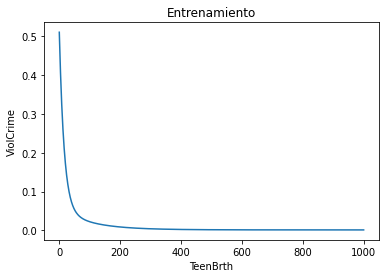

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("TeenBrth")
ax.set_ylabel("ViolCrime")
ax.plot(costo)
ax.set_title("Entrenamiento")
plt.show()

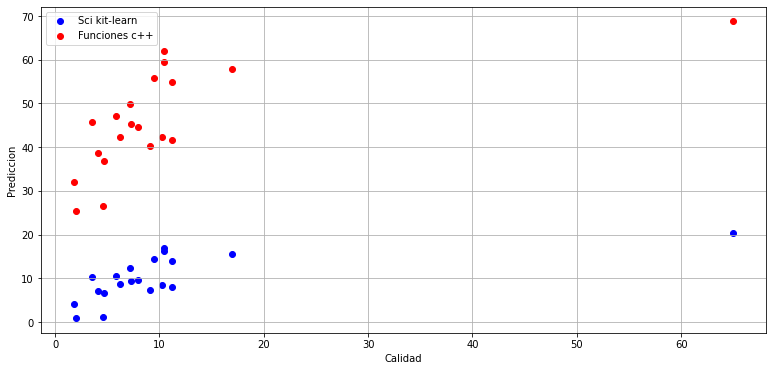

In [ ]:
# Se hace la grafica de mejor ajuste para visualizar la comparacion entre y_train_hat en ambos casos
plt.figure(figsize=(13,6))
plt.scatter(y_Train[:20], y_hat_TrainPy[:20], c='b', label='Sci kit-learn')
plt.scatter(y_Train[:20], y_train_hat_Cpp[:20], c='r', label='Funciones c++')
plt.xlabel('Calidad')
plt.ylabel('Prediccion')
plt.legend(loc=2)
plt.grid()
plt.show()

In [ ]:
ModeloLRNorm.fit(X_Test, y_Test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
y_test_hat_Sk = ModeloLRNorm.predict(X_Test)

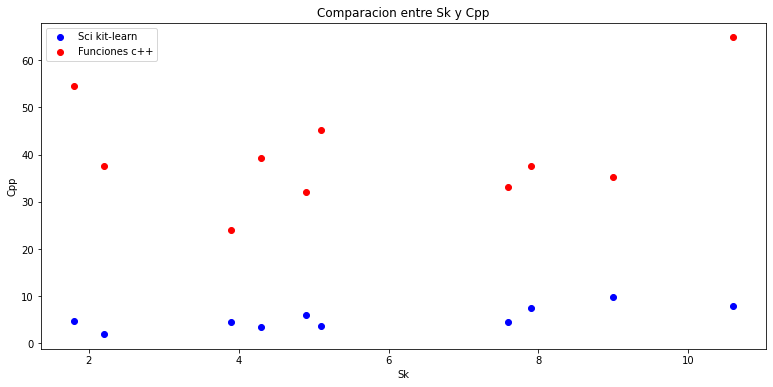

In [ ]:
# Se hace la grafica de mejor ajuste para visualizar la comparacion entre y_train_hat en ambos casos
plt.figure(figsize=(13,6))
plt.scatter(y_Test[:10], y_test_hat_Sk[:10], c='b', label='Sci kit-learn')
plt.scatter(y_Test[:10], y_test_hat_Cpp[:10], c='r', label='Funciones c++')
plt.legend(loc=2)
plt.title("Comparacion entre Sk y Cpp")
plt.xlabel("Sk")
plt.ylabel("Cpp")
plt.show()

Por ultimo, para finalizar con este parcial se procedera a realizar la  metricas de rendimiento.

In [327]:
y_pred = ModeloLRNorm.predict(X_Train)

R2_Score: R2 Score es una metrica de rendimiento la cual revela el porcentaje de correlacion entre las 2 variables, siendo 1/100%  que estas estan perfectamente relacionadas y 0/0% siendo que no tienen relacion alguna, estos valores tambien pueden ser negativos.

In [328]:
r2_score(y_Train, y_pred)

0.3272727139169074

Con este valor de 0.32/32% se puede decir que este modelo realizado carece de correlacion.